In [2]:
# discretization(binnig)

In [3]:
# unsupervised , supervised , cluster bininig

In [4]:
# equal width binnig (uniform binnig)
# equal frequency binnig (quantily binnig)
# kmeans binnig

In [5]:
# decision binnig

In [6]:
#age  -> 27,32,84,56,... ,bins = 10 , max-min = bins

In [7]:
import pandas as pd
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
X= df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [17]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6303012519561816

In [26]:
kbins_age = KBinsDiscretizer(n_bins=15 , encode='ordinal',strategy = 'quantile')
kbins_fare = KBinsDiscretizer(n_bins=15, encode='ordinal',strategy = 'quantile')

In [27]:
trf = ColumnTransformer([
    ('first',kbins_age,[0]),
    ('second',kbins_fare,[1])
])

In [28]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [29]:
trf.named_transformers_.first.bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [30]:
trf.named_transformers_.second.bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [31]:
clf = DecisionTreeClassifier()

In [32]:
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [33]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [34]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6723004694835681

In [43]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After Age")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before Fare")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("After Fare")

    plt.show()
    

0.6317097026604068


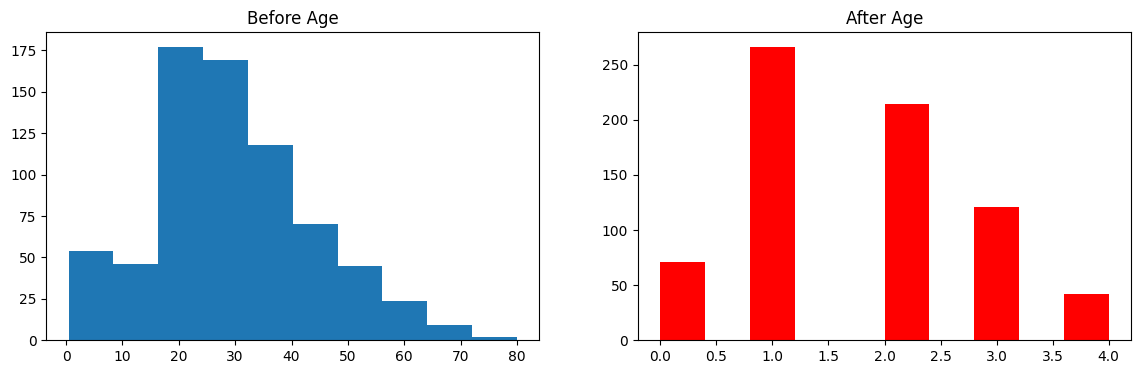

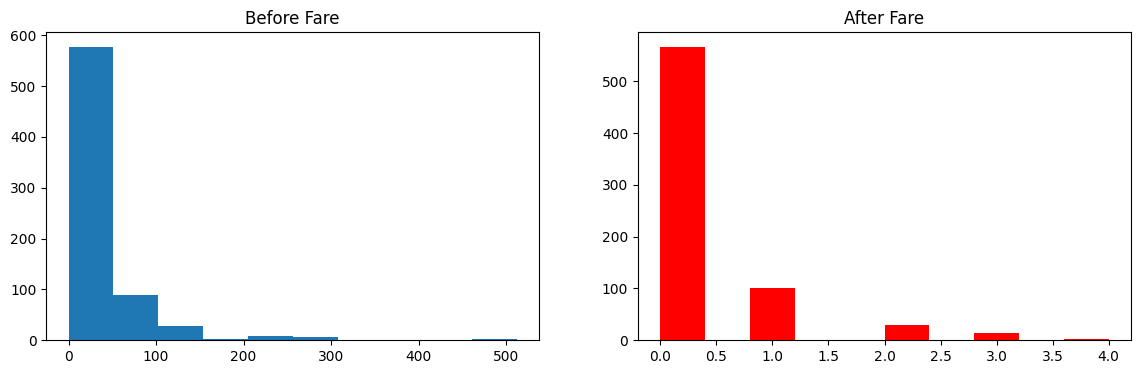

In [44]:
discretize(5,'kmeans')

In [49]:
# binarization -> special case of d numerical value -> binary

In [50]:
#Discretization -> continuos value -> discrete 

In [51]:
#image processing

In [53]:
#threshold = 127.5 , copy = true

In [54]:
import numpy as np
import pandas as pd

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer


In [56]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]


In [57]:
df.dropna(inplace=True)


In [58]:
df.head()


,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [59]:
df['family'] = df['SibSp'] + df['Parch']

In [60]:
df.head()


,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [61]:
df.drop(columns=['SibSp','Parch'],inplace=True)


In [62]:
df.head()


,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [63]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [65]:
X_train.head()


,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [66]:

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6503496503496503

In [67]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))


0.6527386541471049

In [68]:
from sklearn.preprocessing import Binarizer


In [69]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [70]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [71]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])


,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [72]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6223776223776224

In [73]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6275821596244132